## Capstone 1: Wine Quality prediction

In [1]:
# imports
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

#### Get the red and white wine quality dataset

In [2]:
# Load the data
wine_data = pd.read_csv("winequalityN.csv")
# Examine the dataset
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


The dataset describes how different features like volatile acidity, pH, alcohol content affect the quality of red and white wines. The wine quality is rated on a scale of 1 to 10.

### Convert to dataframe

In [3]:
df = pd.DataFrame(wine_data)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df_grouped = df.groupby(df.type)

### Separate the red and white wine data

#### Examine red wine dataset

In [5]:
red = df_grouped.get_group("red")
red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 4898 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1599 non-null   object 
 1   fixed acidity         1597 non-null   float64
 2   volatile acidity      1598 non-null   float64
 3   citric acid           1598 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1597 non-null   float64
 10  sulphates             1597 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 174.9+ KB


#### Get the quality distribution of red wines

In [6]:
from collections import Counter
counts = Counter(red.quality)
d_f = pd.DataFrame(counts.items(), columns=['quality', 'number of red wines'])
percent = []
for i in d_f['number of red wines']:
    percent.append(((i/1599)*100))
    
#print(percent)
percents = np.asarray(percent)
d_f['percent'] = pd.Series(percents)
d_f.sort_index()
d_f

,quality,number of red wines,percent
0,5,681,42.589118
1,6,638,39.899937
2,7,199,12.445278
3,4,53,3.314572
4,8,18,1.125704
5,3,10,0.625391


Text(0.5, 1.0, 'Percentage Distribution of Red Wine Quality')

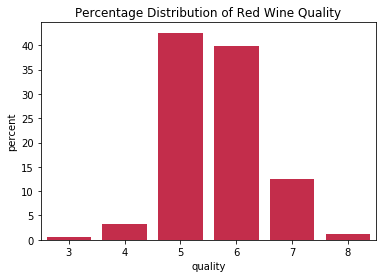

In [7]:
sns.barplot(x='quality',y='percent',data=d_f, color='crimson')
plt.title('Percentage Distribution of Red Wine Quality')

Majority of red wines are of medium quality (between 5-7 on a scale of 10)

#### Examine white wine dataset

In [8]:
white = df_grouped.get_group("white")
white.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


In [9]:
counts_1 = Counter(white.quality)
d_f_1 = pd.DataFrame(counts_1.items(), columns=['quality', 'number of white wines'])
percentage = []
for i in d_f_1['number of white wines']:
    percentage.append(((i/4898)*100))
    
#print(percentage)
percentz = np.asarray(percentage)
d_f_1['percent'] = pd.Series(percentz)
d_f_1.sort_index()
d_f_1

,quality,number of white wines,percent
0,6,2198,44.875459
1,5,1457,29.746835
2,7,880,17.966517
3,8,175,3.572887
4,4,163,3.327889
5,3,20,0.408330
6,9,5,0.102082


Text(0.5, 1.0, 'Percentage Distribution of White Wine Quality')

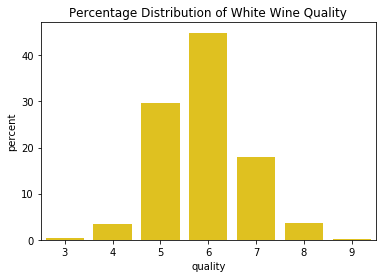

In [10]:
sns.barplot(x='quality',y='percent',data=d_f_1, color='gold')
plt.title('Percentage Distribution of White Wine Quality')

### Plot correlation matrices to explore how different features affect the wine quality

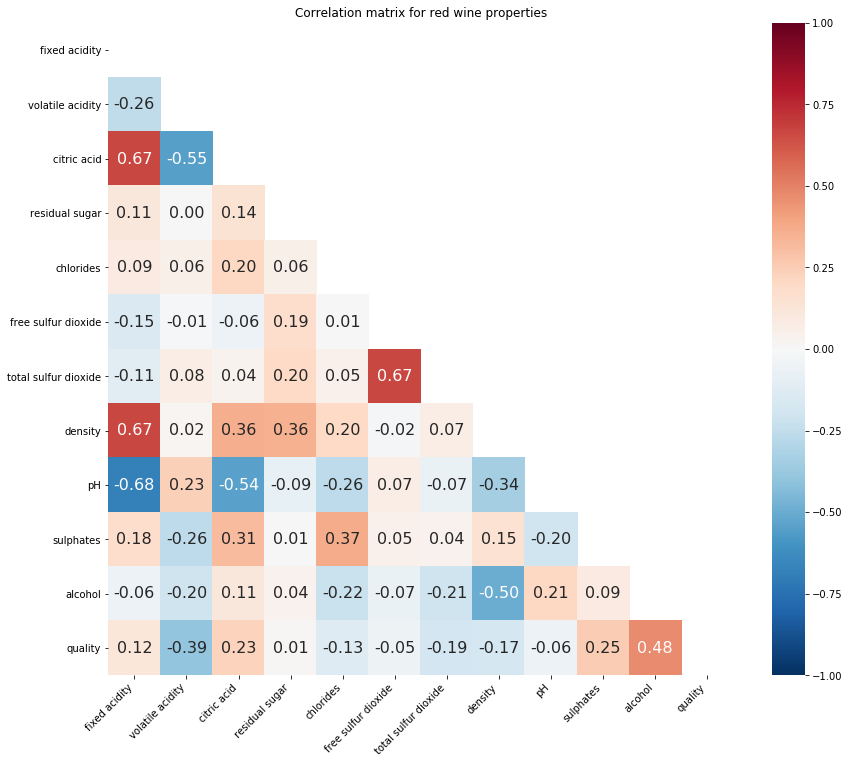

In [11]:
# corr for red wines
corr = red.corr()
mask = np.triu(np.ones_like(corr, dtype=np.float))
plt.figure(figsize=(14, 12))
plot_1 = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', linewidths=0, vmin=-1, cmap="RdBu_r", 
                     annot_kws={"size": 16})
plot_1.set_title("Correlation matrix for red wine properties")
plot_1.set_xticklabels(
    plot_1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Red wines seem to have strong/ moderate correlations between citric acid, density and pH with fixed acidity and volatile acidity, alcohol with quality.

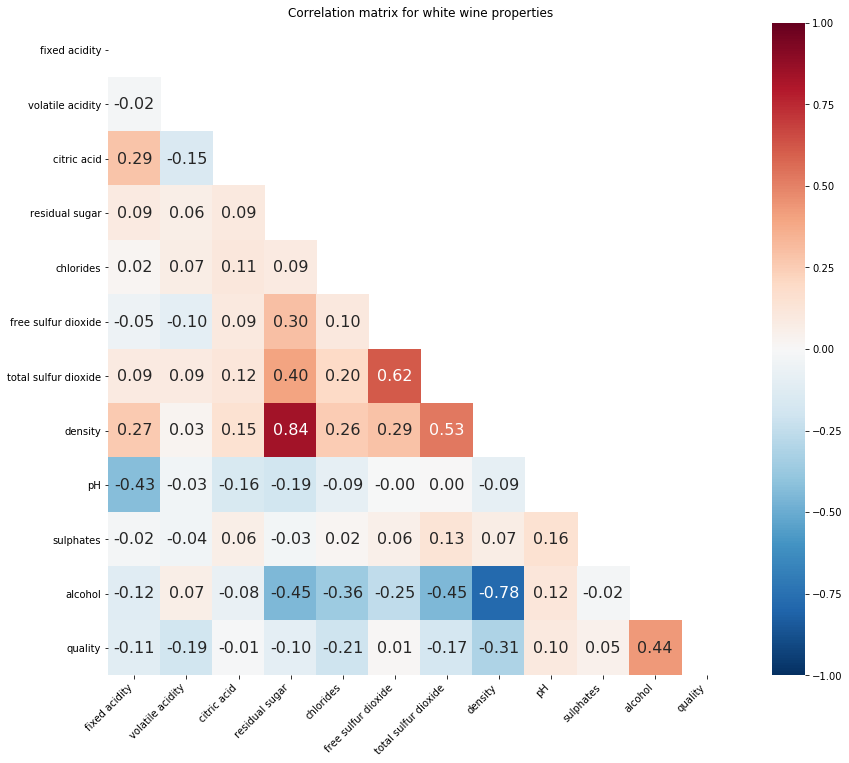

In [12]:
# corr for white wines
corr_1 = white.corr()
masked = np.triu(np.ones_like(corr_1, dtype=np.float))
plt.figure(figsize=(14, 12))
plot_2 = sns.heatmap(corr_1, mask=masked, annot=True, fmt='.2f', linewidths=0, vmin=-1, cmap="RdBu_r", annot_kws={"size": 16})
plot_2.set_title("Correlation matrix for white wine properties")
plot_2.set_xticklabels(
    plot_2.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

White wines seem to have strong/moderate correlations between residual sugar, alcohol with density, alcohol and residual sugar, pH and fixed acidity, alcohol and density with quality. We can say there is multicollinearity between density, residual sugar and alcohol. (correlation > 0.7)

#### Segregate and visualize the red wine dataset based on quality groups
##### Quality groups: Low: Wines below 4, Medium: 5-7, High: 8 and above

In [13]:
# separate low quality red wines
low_red = red[red.quality <= 4]
low_red_1 = low_red.insert(0, 'quality_groups', 'low')
low_red_2 = low_red.set_index(['quality'])
low_red_2

,quality_groups,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,,,
4,low,red,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.00
4,low,red,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.80
4,low,red,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.30
4,low,red,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10
4,low,red,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,low,red,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.10
4,low,red,7.2,0.580,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.30
4,low,red,6.8,0.910,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.90


In [14]:
# separate medium quality red wines
medium_red = red[((red.quality > 4) & (red.quality <= 6))]
medium_red_1 = medium_red.insert(0, 'quality_groups', 'medium')
medium_red_2 = medium_red.set_index(['quality'])
medium_red_2

,quality_groups,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,,,
5,medium,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,medium,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
5,medium,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
6,medium,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,medium,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,medium,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6,medium,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2
6,medium,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0


In [15]:
# separate high quality red wines
high_red = red[red.quality >= 7]
high_red_1 = high_red.insert(0, 'quality_groups', 'high')
high_red_2 = high_red.set_index(['quality'])
high_red_2

,quality_groups,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,,,
7,high,red,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00
7,high,red,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50
7,high,red,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50
7,high,red,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70
7,high,red,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,high,red,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90
7,high,red,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20
8,high,red,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40


In [16]:
# combine the datasets to get a new dataset sorted according to quality and quality groups
result = low_red_2.append(medium_red_2)
result_red = result.append(high_red_2)
result_red

,quality_groups,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,,,
4,low,red,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.00
4,low,red,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.80
4,low,red,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.30
4,low,red,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10
4,low,red,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,high,red,7.4,0.250,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90
7,high,red,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20
8,high,red,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40


#### Check for Nans in the dataset

In [17]:
# check for Nan values in the dataset
result_red.isnull().values.any()

True

In [18]:
# Fill out all Nans with median of that column
column_median = result_red.median()
result_red = result_red.fillna(column_median)

In [19]:
# check for Nan values again
result_red.isnull().values.any()

False

#### Visualization 2: Box plots for red wines

Based on correlation matrix for red wines, we saw that volatile acidity, alcohol, density and citric acid may have high collinearity with the quality rating. Therefore, let us visualize these features with box plots.

Text(0.5, 1.0, 'Graph of volatile acidity vs quality of red wines')

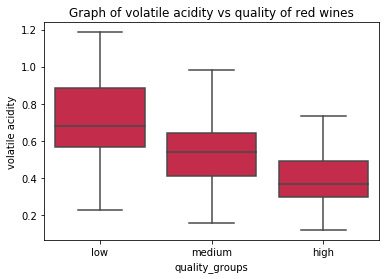

In [20]:
# create boxplots for volatile acidity vs quality of red wines
plot = sns.boxplot(x='quality_groups', y='volatile acidity', data=result_red, color = 'crimson', showfliers=False)
plot.set_title("Graph of volatile acidity vs quality of red wines")
# control x and y limits
#plt.ylim(0, 1.65)

In [21]:
result_red = result_red.reset_index()

In [22]:
result_red['quality_groups'] = result_red['quality_groups'].astype('category')

In [23]:
import researchpy as rp

rp.summary_cont(result_red['volatile acidity'].groupby(result_red['quality_groups']))

,N,Mean,SD,SE,95% Conf.,Interval
quality_groups,,,,,,
high,217,0.405530,0.144963,0.009841,0.386198,0.424862
low,63,0.724206,0.247970,0.031241,0.662482,0.785931
medium,1319,0.538453,0.167646,0.004616,0.529402,0.547504


In [24]:
#For Median
#median_value=result_red['volatile acidity'].median()
#result_red['volatile acidity']= result_red['volatile acidity'].fillna(median_value)

In [25]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import statsmodels.stats.multicomp as multi

# Conducting a post hoc comparison test to check for type 1 error
mc1=multi.MultiComparison(result_red['volatile acidity'],result_red['quality_groups'])
res1=mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  high    low   0.3187 0.001  0.2621  0.3753   True
  high medium   0.1329 0.001  0.1039  0.1619   True
   low medium  -0.1858 0.001 -0.2368 -0.1347   True
---------------------------------------------------


Volatile acidity could be an indicator of spoilage, or errors in the manufacturing processes — caused by things like damaged grapes or wine exposed to air. This causes acetic acid bacteria to enter and thrive, and give rise to unpleasant tastes and smells. Its reasonable to see that volatile acidity content is lesser in high quality red wines. It is most in low quality red wines. There is one outlier in low and high quality groups. 

Text(0.5, 1.0, 'Graph of alcohol content vs quality of red wines')

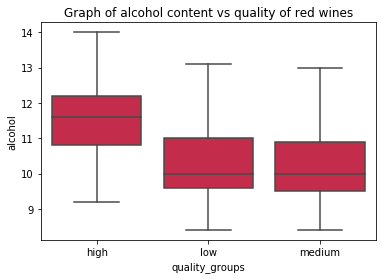

In [26]:
# create box plots for alcohol vs quality for red wines
plot_1 = sns.boxplot(x='quality_groups', y='alcohol', data=result_red, color = 'crimson', showfliers=False)
plot_1.set_title("Graph of alcohol content vs quality of red wines")
# control x and y limits
#plt.ylim(8, 15)

High quality red wines (8 and above) have a higher alcohol content. Low and medium quality wines might have roughly the same range of alcohol content. There seem to be a few outliers in medium quality red wines, where despite high alcohol content, their quality rating is below 8.

In [27]:
rp.summary_cont(result_red['alcohol'].groupby(result_red['quality_groups']))

,N,Mean,SD,SE,95% Conf.,Interval
quality_groups,,,,,,
high,217,11.518049,0.998153,0.067759,11.384934,11.651164
low,63,10.215873,0.918178,0.115680,9.987320,10.444426
medium,1319,10.252717,0.972354,0.026773,10.200221,10.305212


In [28]:
# Conducting a post hoc comparison test to check for type 1 error
mc2=multi.MultiComparison(result_red['alcohol'],result_red['quality_groups'])
res2=mc2.tukeyhsd()
print(res2.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  high    low  -1.3022 0.001 -1.6291 -0.9752   True
  high medium  -1.2653 0.001 -1.4327  -1.098   True
   low medium   0.0368   0.9 -0.2578  0.3315  False
---------------------------------------------------


Text(0.5, 1.0, 'Graph of density vs quality of red wines')

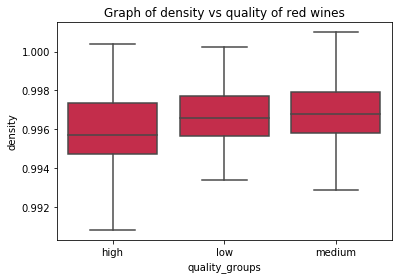

In [29]:
# create boxplots for density vs quality of red wines
ax = sns.boxplot(x='quality_groups', y='density', data=result_red, color = 'crimson', showfliers=False)
ax.set_title("Graph of density vs quality of red wines")

Sweeter wines generally have higher densities. High quality red wines seem to have slightly lesser densities compared to low and medium quality ones. Lesser density could be an indicator of more acidity/lesser pH.

In [30]:
rp.summary_cont(result_red['density'].groupby(result_red['quality_groups']))

,N,Mean,SD,SE,95% Conf.,Interval
quality_groups,,,,,,
high,217,0.996030,0.002201,0.000149,0.995737,0.996324
low,63,0.996689,0.001667,0.000210,0.996274,0.997104
medium,1319,0.996867,0.001815,0.000050,0.996769,0.996965


In [31]:
# Conducting a post hoc comparison test to check for type 1 error
mc3=multi.MultiComparison(result_red['density'],result_red['quality_groups'])
res3=mc3.tukeyhsd()
print(res3.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  high    low   0.0007 0.0368     0.0 0.0013   True
  high medium   0.0008  0.001  0.0005 0.0012   True
   low medium   0.0002 0.7193 -0.0004 0.0007  False
---------------------------------------------------


Text(0.5, 1.0, 'Graph of citric acid vs quality of red wines')

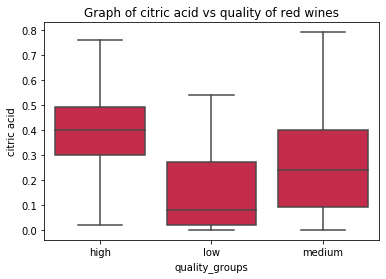

In [32]:
# create boxplots for citric acid vs quality of red wines
plot_3 = sns.boxplot(x='quality_groups', y='citric acid', data=result_red, color = 'crimson', showfliers=False)
plot_3.set_title("Graph of citric acid vs quality of red wines")
#plt.ylim(-0.01, 1.6)

Citric acid is generally found in very small quantities in wine grapes. It acts as a preservative and is added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. Citric acid content seems to be slightly higher in high quality red wines. It can be added to finished wines to increase acidity and give a “fresh” flavor.

In [33]:
#For Median
#median_value_1=result_red['citric acid'].median()
#result_red['citric acid']= result_red['citric acid'].fillna(median_value_1)

In [34]:
rp.summary_cont(result_red['citric acid'].groupby(result_red['quality_groups']))

,N,Mean,SD,SE,95% Conf.,Interval
quality_groups,,,,,,
high,217,0.376498,0.194438,0.013199,0.350567,0.402428
low,63,0.173651,0.207406,0.026131,0.122023,0.225278
medium,1319,0.258461,0.187860,0.005173,0.248319,0.268603


In [35]:
# Conducting a post hoc comparison test to check for type 1 error
mc4=multi.MultiComparison(result_red['citric acid'],result_red['quality_groups'])
res4=mc4.tukeyhsd()
print(res4.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  high    low  -0.2028  0.001 -0.2665 -0.1392   True
  high medium   -0.118  0.001 -0.1506 -0.0855   True
   low medium   0.0848 0.0016  0.0275  0.1422   True
----------------------------------------------------


#### Segregate white wines data into low, medium and high quality groups

In [36]:
# separate low quality white wines
low_white = white[white.quality <= 4]
low_white_1 = low_white.insert(0, 'quality_groups', 'low')
low_white_2 = low_white.set_index(['quality'])
low_white_2

,quality_groups,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,,,
4,low,white,6.2,0.450,0.26,4.40,0.063,63.0,206.0,0.99400,3.27,0.52,9.8
4,low,white,9.8,0.360,0.46,10.50,NaN,4.0,83.0,0.99560,2.89,0.30,10.1
4,low,white,5.5,0.485,0.00,1.50,0.065,8.0,103.0,0.99400,3.63,0.40,9.7
4,low,white,6.4,0.595,0.14,5.20,0.058,15.0,97.0,0.99510,3.38,0.36,9.0
4,low,white,7.6,0.480,0.37,0.80,0.037,4.0,100.0,0.99020,3.03,0.39,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,low,white,7.1,0.240,0.34,1.20,0.045,6.0,132.0,0.99132,3.16,0.46,11.2
4,low,white,6.0,0.590,0.00,0.80,0.037,30.0,95.0,0.99032,3.10,0.40,10.9
4,low,white,6.0,0.350,0.46,0.90,0.033,9.0,65.0,0.98934,3.24,0.35,12.1


In [37]:
# separate medium quality white wines
medium_white = white[(white.quality > 4) & (white.quality <= 6)]
medium_white_1 = medium_white.insert(0, 'quality_groups', 'medium')
medium_white_2 = medium_white.set_index(['quality'])
medium_white_2

,quality_groups,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,,,
6,medium,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
6,medium,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
6,medium,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
6,medium,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
6,medium,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,medium,white,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,NaN,0.54,9.7
6,medium,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
5,medium,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6


In [38]:
# separate high quality white wines 
high_white = white[white.quality >= 7]
high_white_1 = high_white.insert(0, 'quality_groups', 'high')
high_white_2 = high_white.set_index(['quality'])
high_white_2

,quality_groups,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,,,
7,high,white,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.99120,3.54,0.52,12.40
7,high,white,6.6,0.17,0.38,1.5,0.032,28.0,112.0,0.99140,3.25,0.55,11.40
8,high,white,NaN,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.80
8,high,white,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.80
7,high,white,6.4,0.31,0.38,2.9,0.038,19.0,102.0,0.99120,3.17,0.35,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,high,white,6.1,0.32,0.28,6.6,0.021,29.0,132.0,0.99188,3.15,0.36,11.45
7,high,white,6.2,0.38,0.42,2.5,0.038,34.0,117.0,0.99132,3.36,0.59,11.60
7,high,white,6.2,0.21,0.28,5.7,0.028,45.0,121.0,0.99168,3.21,1.08,12.15


In [39]:
# combine the datasets to get a new dataset sorted according to quality and quality groups
resultwhite = low_white_2.append(medium_white_2)
result_white = resultwhite.append(high_white_2)
result_white

,quality_groups,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,,,
4,low,white,6.2,0.450,0.26,4.4,0.063,63.0,206.0,0.99400,3.27,0.52,9.80
4,low,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.10
4,low,white,5.5,0.485,0.00,1.5,0.065,8.0,103.0,0.99400,3.63,0.40,9.70
4,low,white,6.4,0.595,0.14,5.2,0.058,15.0,97.0,0.99510,3.38,0.36,9.00
4,low,white,7.6,0.480,0.37,0.8,0.037,4.0,100.0,0.99020,3.03,0.39,11.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,high,white,6.1,0.320,0.28,6.6,0.021,29.0,132.0,0.99188,3.15,0.36,11.45
7,high,white,6.2,0.380,0.42,2.5,0.038,34.0,117.0,0.99132,3.36,0.59,11.60
7,high,white,6.2,0.210,0.28,5.7,0.028,45.0,121.0,0.99168,3.21,1.08,12.15


#### Check for nans or null values and replace them with median

In [40]:
# check for Nan values in the dataset
result_white.isnull().values.any()

True

In [41]:
# Fill out all Nans with median of that column
column_median = result_white.median()
result_white = result_white.fillna(column_median)
# check for Nan values again
result_white.isnull().values.any()

False

#### Box plots for white wines

Text(0.5, 1.0, 'Graph of volatile acidity vs quality of white wines')

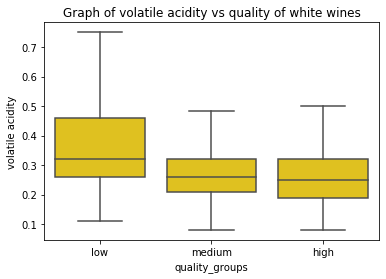

In [42]:
# create box plots of volatile acidity vs quality of white wines
plot_4 = sns.boxplot(x='quality_groups', y='volatile acidity', data=result_white, color = 'gold', showfliers=False)
plot_4.set_title("Graph of volatile acidity vs quality of white wines")
#plt.ylim(0, 1.6)

The change in volatile acidity with quality groups is not as distinct as it is with red wines. For white wines, the volatile acidity is only slighly higher for low quality compared to medium quality. Even with high quality white wines the volatile acidity is not significantly lower but only slightly lower with fewer outliers. It is said that wine experts can often tell the volatile acidity just by smelling it. Well in case of white wines, it might be a bit difficult to distinguish because of the smaller changes.

In [43]:
result_white = result_white.reset_index()

In [44]:
result_white['quality_groups'] = result_white['quality_groups'].astype('category')

In [45]:
#For Median
#median_value_2=result_white['volatile acidity'].median()
#result_white['volatile acidity']= result_white['volatile acidity'].fillna(median_value_2)

In [46]:
rp.summary_cont(result_white['volatile acidity'].groupby(result_white['quality_groups']))

,N,Mean,SD,SE,95% Conf.,Interval
quality_groups,,,,,,
high,1060,0.265392,0.093962,0.002886,0.259732,0.271051
low,183,0.375984,0.170525,0.012606,0.351209,0.400758
medium,3655,0.277053,0.095217,0.001575,0.273966,0.280141


In [47]:
# Conducting a post hoc comparison test to check for type 1 error
mc5=multi.MultiComparison(result_white['volatile acidity'],result_white['quality_groups'])
res5=mc5.tukeyhsd()
print(res5.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  high    low   0.1106  0.001  0.0921  0.1291   True
  high medium   0.0117 0.0021  0.0036  0.0197   True
   low medium  -0.0989  0.001 -0.1165 -0.0814   True
----------------------------------------------------


Text(0.5, 1.0, 'Graph of alcohol content vs quality of white wines')

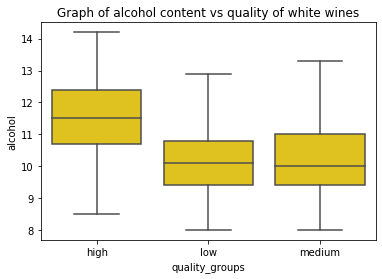

In [48]:
# create box plots of alcohol vs quality of white wines
plot_5 = sns.boxplot(x='quality_groups', y='alcohol', data=result_white, color = 'gold', showfliers=False)
plot_5.set_title("Graph of alcohol content vs quality of white wines")
#plt.ylim(-0.001, 1.65)

Alcohol content is slightly more in high quality white wines. There are no obvious outliers.

In [49]:
rp.summary_cont(result_white['alcohol'].groupby(result_white['quality_groups']))

,N,Mean,SD,SE,95% Conf.,Interval
quality_groups,,,,,,
high,1060,11.416022,1.255209,0.038553,11.340422,11.491622
low,183,10.173497,1.027570,0.075960,10.024207,10.322788
medium,3655,10.269808,1.104035,0.018262,10.234010,10.305605


In [50]:
# Conducting a post hoc comparison test to check for type 1 error
mc7=multi.MultiComparison(result_white['alcohol'],result_white['quality_groups'])
res7=mc7.tukeyhsd()
print(res7.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  high    low  -1.2425  0.001 -1.4557 -1.0294   True
  high medium  -1.1462  0.001 -1.2391 -1.0533   True
   low medium   0.0963 0.5032 -0.1054   0.298  False
----------------------------------------------------


Text(0.5, 1.0, 'Graph of density vs quality of white wines')

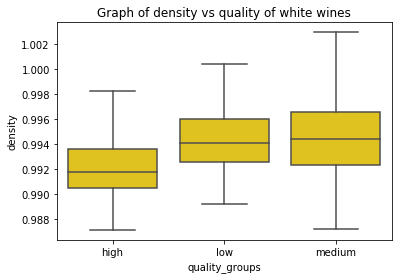

In [51]:
# create boxplots for density vs quality of red wines
plot_6 = sns.boxplot(x='quality_groups', y='density', data=result_white, color = 'gold', showfliers=False)
plot_6.set_title("Graph of density vs quality of white wines")

The density of white wines does not vary much with respect to quality groups, with high quality white wines having only slighlty lower density, as is the case with red wines. There are 2 outliers in medium quality white wines who have significantly higher densities.

In [52]:
rp.summary_cont(result_white['density'].groupby(result_white['quality_groups']))

,N,Mean,SD,SE,95% Conf.,Interval
quality_groups,,,,,,
high,1060,0.992412,0.002772,0.000085,0.992245,0.992579
low,183,0.994343,0.002504,0.000185,0.993979,0.994707
medium,3655,0.994480,0.002913,0.000048,0.994386,0.994574


In [53]:
# Conducting a post hoc comparison test to check for type 1 error
mc8=multi.MultiComparison(result_white['density'],result_white['quality_groups'])
res8=mc8.tukeyhsd()
print(res8.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  high    low   0.0019  0.001  0.0014 0.0025   True
  high medium   0.0021  0.001  0.0018 0.0023   True
   low medium   0.0001 0.7829 -0.0004 0.0006  False
---------------------------------------------------


Text(0.5, 1.0, 'Graph of citric acid vs quality of white wines')

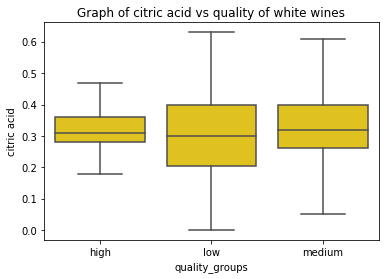

In [54]:
# create boxplots for citric acid vs quality of red wines
plot_5 = sns.boxplot(x='quality_groups', y='citric acid', data=result_white, color = 'gold', showfliers=False)
plot_5.set_title("Graph of citric acid vs quality of white wines")
#plt.ylim(-0.0001, 1.45)

Citric acid content does not vary a lot according to quality groups of white wines. There are however, a few outliers in each quality group.

In [55]:
#For Median
#median_value_3=result_white['citric acid'].median()
#result_white['citric acid']= result_white['citric acid'].fillna(median_value_3)

In [56]:
rp.summary_cont(result_white['citric acid'].groupby(result_white['quality_groups']))

,N,Mean,SD,SE,95% Conf.,Interval
quality_groups,,,,,,
high,1060,0.326057,0.080288,0.002466,0.321221,0.330892
low,183,0.307705,0.157131,0.011615,0.284876,0.330534
medium,3655,0.337948,0.128228,0.002121,0.333790,0.342106


In [57]:
# Conducting a post hoc comparison test to check for type 1 error
mc9=multi.MultiComparison(result_white['citric acid'],result_white['quality_groups'])
res9=mc9.tukeyhsd()
print(res9.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  high    low  -0.0184 0.1393 -0.041 0.0043  False
  high medium   0.0119 0.0133  0.002 0.0218   True
   low medium   0.0302 0.0027 0.0088 0.0517   True
--------------------------------------------------


We did not get any strongly conclusive results from the Tukey test. Since we are interested in getting the best quality wines, we will now build a classification model to predict wine quality wherein wines rated greater than or equal to 7 are of good quality and those less than 7 are poor quality.

#### VIF Scores to check for multicollinearity

#### On red wines

In [58]:
result_red.columns

Index(['quality', 'quality_groups', 'type', 'fixed acidity',
       'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [59]:
# creating copy of series 
new = result_red.copy(deep=True) 

In [60]:
new

,quality,quality_groups,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,4,low,red,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.00
1,4,low,red,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.80
2,4,low,red,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.30
3,4,low,red,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10
4,4,low,red,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,7,high,red,7.4,0.250,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90
1595,7,high,red,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20
1596,8,high,red,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40
1597,7,high,red,7.0,0.560,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55


In [61]:
# creating copy of series 
new = new.rename(columns= {'fixed acidity': 'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar' , 'free sulfur dioxide':'free_sulp_oxide' , 'total sulfur dioxide':'total_sulp_oxide'})

In [62]:
new

,quality,quality_groups,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulp_oxide,total_sulp_oxide,density,pH,sulphates,alcohol
0,4,low,red,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.00
1,4,low,red,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.80
2,4,low,red,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.30
3,4,low,red,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10
4,4,low,red,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,7,high,red,7.4,0.250,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90
1595,7,high,red,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20
1596,8,high,red,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40
1597,7,high,red,7.0,0.560,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55


In [63]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
#gather features
#features = "+".join(scaled_df.columns - ["quality"])

# get y and X dataframes based on this regression:
y, X = dmatrices('quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulp_oxide + total_sulp_oxide + pH + sulphates + alcohol', new, return_type='dataframe')

In [64]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [65]:
vif.round(1)

,VIF Factor,features
0,1429.6,Intercept
1,3.0,fixed_acidity
2,1.8,volatile_acidity
3,3.1,citric_acid
4,1.1,residual_sugar
5,1.5,chlorides
6,1.9,free_sulp_oxide
7,2.2,total_sulp_oxide
8,2.2,pH
9,1.3,sulphates


Since the VIF scores are below 10 for all the features, hence we keep all the features and move on to logistic regression.

#### On white wines

In [66]:
# creating copy of series 
new_1 = result_white.copy(deep=True) 

In [67]:
# creating copy of series 
new_1 = new_1.rename(columns= {'fixed acidity': 'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar' , 'free sulfur dioxide':'free_sulp_oxide' , 'total sulfur dioxide':'total_sulp_oxide'})

In [68]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
#gather features
#features = "+".join(scaled_df.columns - ["quality"])

# get y and X dataframes based on this regression:
y_1, X_1 = dmatrices('quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulp_oxide + total_sulp_oxide + pH + sulphates + alcohol', new_1, return_type='dataframe')

In [69]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["features"] = X_1.columns

In [70]:
vif.round(1)

,VIF Factor,features
0,1038.3,Intercept
1,1.4,fixed_acidity
2,1.1,volatile_acidity
3,1.2,citric_acid
4,1.4,residual_sugar
5,1.2,chlorides
6,1.7,free_sulp_oxide
7,2.2,total_sulp_oxide
8,1.3,pH
9,1.1,sulphates


#### Logistic Regression on red wines using statsmodels

#### On unscaled data

In [71]:
# Define a function which separates good wines from poor quality ones
def is_good(quality):
    if quality >= 7:
        return 1
    else:
        return 0

In [72]:
# Apply the function we defined earlier to make a new column which has a rating of 1 for good quality wines and 0 for others
result_red['good quality'] = result_red['quality'].apply(is_good)

In [73]:
unscaled = result_red.drop(['quality', 'quality_groups', 'type'], axis=1)

In [74]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# defining the dependent and independent variables 
trainX_red = unscaled[['fixed acidity' , 'volatile acidity' , 'citric acid' , 'residual sugar' , 'chlorides' , 'free sulfur dioxide' , 'total sulfur dioxide' , 'density' , 'pH', 'sulphates', 'alcohol']] 
trainy_red = unscaled[['good quality']] 
   
# building the model and fitting the data 
log_reg = sm.Logit(trainy_red, trainX_red).fit() 

Optimization terminated successfully.
         Current function value: 0.273983
         Iterations 8


In [75]:
# printing the summary table 
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           good quality   No. Observations:                 1599
Model:                          Logit   Df Residuals:                     1588
Method:                           MLE   Df Model:                           10
Date:                Tue, 29 Sep 2020   Pseudo R-squ.:                  0.3100
Time:                        16:23:23   Log-Likelihood:                -438.10
converged:                       True   LL-Null:                       -634.96
Covariance Type:            nonrobust   LLR p-value:                 2.040e-78
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0593      0.081      0.736      0.462      -0.099       0.217
volatile acidity        -3.0907      0.767     -4.031      0.000      -4.593      -1.588
citric acid 

The p value for volatile acidity, chlorides, density, sulphates and alcohol is significant. This indicates that these features have more influence on the quality of red wine.

In [76]:
# Get the odds ratio by taking exponential of the coefficients
print(np.exp(log_reg.params).sort_values(ascending=False))

sulphates               31.400246
alcohol                  2.639836
citric acid              1.304531
residual sugar           1.153877
fixed acidity            1.061138
free sulfur dioxide      1.013586
total sulfur dioxide     0.982516
pH                       0.389994
volatile acidity         0.045469
density                  0.000049
chlorides                0.000043
dtype: float64


The odds ratio for sulphates is too high. This might be because the data is not scaled. For density, the odds ratio is lowest indicating a change in density will have minimum effect on whether or not a wine is of good quality. We will see 3140% increase in the odds of a red wine being of good quality for a one-unit increase in sulphates!

#### On scaled data

In [77]:
unscaled.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'good quality'],
      dtype='object')

In [78]:
# Normalize feature variables
from sklearn import preprocessing
# Get column names first
names = unscaled.columns
# Create the Scaler object
scaler = preprocessing.RobustScaler()
# Fit your data on the scaler object
scaled_red = scaler.fit_transform(unscaled)
scaled_red = pd.DataFrame(scaled_red, columns=names)

#### Check for rfe ranking

In [79]:
# defining the dependent and independent variables 
Xtrain = scaled_red[['fixed acidity' , 'volatile acidity' , 'citric acid' , 'chlorides' , 'free sulfur dioxide' , 'total sulfur dioxide' , 'pH', 'sulphates', 'alcohol']] 
ytrain = scaled_red[['good quality']] 
   
data_final=scaled_red.columns.values.tolist()
y=['y']
X=[i for i in data_final if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 12)
rfe = rfe.fit(Xtrain, ytrain.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
#print(rfe.get_params())

[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]


In [80]:
scaled_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'good quality'],
      dtype='object')

In [81]:
scaled_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good quality
0,-0.238095,0.28,-0.545455,3.142857,0.35,-0.571429,-0.225,0.290828,0.368421,-0.666667,-0.75000,0.0
1,-1.047619,2.44,-0.515152,-1.000000,4.65,-0.500000,-0.475,-1.230425,1.000000,-0.777778,-0.25000,0.0
2,0.428571,0.36,0.121212,0.857143,0.45,0.214286,0.200,0.380313,-0.263158,-0.611111,-0.56250,0.0
3,-1.571429,0.00,-0.333333,-0.142857,-1.25,-0.428571,0.675,-1.498881,3.105263,-0.333333,1.81250,0.0
4,0.190476,0.62,0.000000,-0.142857,0.25,-0.214286,0.125,0.380313,0.000000,-0.500000,-0.62500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-0.238095,-1.08,0.090909,0.000000,-1.25,0.357143,0.275,-0.040268,0.473684,0.777778,0.43750,1.0
1595,0.238095,-0.60,0.515152,0.142857,-0.80,-0.142857,-0.475,-0.559284,-0.736842,1.055556,0.62500,1.0
1596,-0.238095,-0.64,0.121212,-0.571429,-0.25,0.214286,-0.350,-1.145414,-0.368421,0.444444,0.75000,1.0
1597,-0.428571,0.16,-0.272727,-0.714286,-0.70,0.071429,-0.350,-0.720358,0.684211,0.333333,0.21875,1.0


In [82]:
# defining the dependent and independent variables 
Xtrain = scaled_red[['fixed acidity' , 'volatile acidity' , 'citric acid' , 'residual sugar' , 'chlorides' , 'free sulfur dioxide' , 'total sulfur dioxide' , 'density' , 'pH', 'sulphates', 'alcohol']] 
ytrain = scaled_red[['good quality']] 
   
# building the model and fitting the data 
log_reg = sm.Logit(ytrain, Xtrain).fit() 

Optimization terminated successfully.
         Current function value: 0.525648
         Iterations 7


In [83]:
# printing the summary table 
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:           good quality   No. Observations:                 1599
Model:                          Logit   Df Residuals:                     1588
Method:                           MLE   Df Model:                           10
Date:                Tue, 29 Sep 2020   Pseudo R-squ.:                 -0.3237
Time:                        16:23:25   Log-Likelihood:                -840.51
converged:                       True   LL-Null:                       -634.96
Covariance Type:            nonrobust   LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -2.7584      0.197    -14.030      0.000      -3.144      -2.373
volatile acidity        -0.3129      0.122     -2.566      0.010      -0.552      -0.074
citric acid 

After scaling the data and running logistic regression, we get significant p values for chlorides maybe, density, sulphates and alcohol.

#### Odds ratio

In [84]:
# Get the odds ratio by taking exponential of the coefficients
print(np.exp(log_reg.params).sort_values(ascending=False))

density                 5.905208
alcohol                 4.120930
citric acid             3.114683
free sulfur dioxide     1.225833
sulphates               0.968081
residual sugar          0.736796
volatile acidity        0.731317
chlorides               0.680911
total sulfur dioxide    0.351313
pH                      0.221379
fixed acidity           0.063394
dtype: float64


The Odds ratio indicates that fixed acidity, citric acid, residual sugar, pH, sulphates and alcohol have more influence over the quality of red wines. Odds ratio value is maximum for alcohol and the least for density.

#### Logistic Regression on white wines using statsmodels 

#### On unscaled data

In [85]:
# Apply the function we defined earlier to make a new column which has a rating of 1 for good quality wines and 0 for others
result_white['good quality'] = result_white['quality'].apply(is_good)

In [86]:
unscaled_white = result_white.drop(['quality', 'quality_groups', 'type'], axis=1)

import statsmodels.formula.api as smf
import statsmodels.api as sm

# defining the dependent and independent variables 
trainX_white = unscaled_white[['fixed acidity' , 'volatile acidity' , 'citric acid' , 'residual sugar' , 'chlorides' , 'free sulfur dioxide' , 'total sulfur dioxide' , 'density' , 'pH', 'sulphates', 'alcohol']] 
trainy_white = unscaled_white[['good quality']] 
   
# building the model and fitting the data 
log_reg = sm.Logit(trainy_white, trainX_white).fit() 

Optimization terminated successfully.
         Current function value: 0.428147
         Iterations 7


In [87]:
# printing the summary table 
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           good quality   No. Observations:                 4898
Model:                          Logit   Df Residuals:                     4887
Method:                           MLE   Df Model:                           10
Date:                Tue, 29 Sep 2020   Pseudo R-squ.:                  0.1803
Time:                        16:23:27   Log-Likelihood:                -2097.1
converged:                       True   LL-Null:                       -2558.4
Covariance Type:            nonrobust   LLR p-value:                8.521e-192
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0772      0.056      1.380      0.168      -0.032       0.187
volatile acidity        -3.9316      0.482     -8.151      0.000      -4.877      -2.986
citric acid 

Looks like the the p value is significant for almost all the features except for fixed acidity, citric acid and total sulfur dioxide!

In [88]:
# Get the odds ratio by taking exponential of the coefficients
print(np.exp(log_reg.params).sort_values(ascending=False))

sulphates               3.673049e+00
pH                      3.596510e+00
alcohol                 2.364114e+00
fixed acidity           1.080260e+00
residual sugar          1.065141e+00
free sulfur dioxide     1.012788e+00
total sulfur dioxide    9.968211e-01
citric acid             4.123928e-01
volatile acidity        1.961138e-02
density                 6.395571e-07
chlorides               1.657071e-08
dtype: float64


#### On scaled data

In [89]:
# Normalize feature variables
from sklearn import preprocessing
# Get column names first
names = unscaled_white.columns
# Create the Scaler object
scaler = preprocessing.RobustScaler()
# Fit your data on the scaler object
scaled_white = scaler.fit_transform(unscaled_white)
scaled_white = pd.DataFrame(scaled_white, columns=names)

In [90]:
scaled_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'good quality'],
      dtype='object')

In [91]:
scaled_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good quality
0,-0.6,1.727273,-0.500000,-0.097561,1.428571,1.260870,1.220339,0.059395,0.473684,0.357143,-0.315789,0.0
1,3.0,0.909091,1.166667,0.646341,0.000000,-1.304348,-0.864407,0.424900,-1.526316,-1.214286,-0.157895,0.0
2,-1.3,2.045455,-2.666667,-0.451220,1.571429,-1.130435,-0.525424,0.059395,2.368421,-0.500000,-0.368421,0.0
3,-0.4,3.045455,-1.500000,0.000000,1.071429,-0.826087,-0.627119,0.310680,1.052632,-0.785714,-0.736842,0.0
4,0.8,2.000000,0.416667,-0.536585,-0.428571,-1.304348,-0.576271,-0.808681,-0.789474,-0.571429,0.526316,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.7,0.545455,-0.333333,0.170732,-1.571429,-0.217391,-0.033898,-0.424900,-0.157895,-0.785714,0.552632,1.0
4894,-0.6,1.090909,0.833333,-0.329268,-0.357143,0.000000,-0.288136,-0.552827,0.947368,0.857143,0.631579,1.0
4895,-0.6,-0.454545,-0.333333,0.060976,-1.071429,0.478261,-0.220339,-0.470588,0.157895,4.357143,0.921053,1.0
4896,-0.6,1.363636,-0.833333,-0.402439,-1.428571,-1.260870,-1.322034,-1.018846,-0.736842,2.285714,1.368421,1.0


In [92]:
scaled_red.equals(scaled_white)

False

#### RFE

In [93]:
# defining the dependent and independent variables 
Xtrain = scaled_white[['fixed acidity' , 'volatile acidity' , 'citric acid' , 'chlorides' , 'density', 'residual sugar', 'free sulfur dioxide' , 'total sulfur dioxide' , 'pH', 'sulphates', 'alcohol']] 
ytrain = scaled_white[['good quality']] 
   
data_final=scaled_white.columns.values.tolist()
y=['y']
X=[i for i in data_final if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 12)
rfe = rfe.fit(Xtrain, ytrain.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
#print(rfe.get_params())

[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]


In [94]:
import statsmodels.formula.api as smf
# building the model and fitting the data 
log_reg = sm.Logit(ytrain, Xtrain).fit() 

Optimization terminated successfully.
         Current function value: 0.612461
         Iterations 6


In [95]:
# printing the summary table 
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           good quality   No. Observations:                 4898
Model:                          Logit   Df Residuals:                     4887
Method:                           MLE   Df Model:                           10
Date:                Tue, 29 Sep 2020   Pseudo R-squ.:                 -0.1725
Time:                        16:23:29   Log-Likelihood:                -2999.8
converged:                       True   LL-Null:                       -2558.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.4094      0.059     -6.936      0.000      -0.525      -0.294
volatile acidity        -0.4237      0.039    -10.763      0.000      -0.501      -0.347
citric acid 

Interestingly, p value is significant for all variables except pH and sulphates.
After scaling the data and removing residual sugar and density variable (because of high VIF scores), logistic regression gives us significant p values for volatile acidity, free sulfur dioxide, sulphates and alcohol.

#### Odds ratio

In [96]:
# Get the odds ratio by taking exponential of the coefficients
print(np.exp(log_reg.params).sort_values(ascending=False))

density                 3.848410
alcohol                 3.372439
free sulfur dioxide     1.187551
total sulfur dioxide    0.860636
citric acid             0.856597
sulphates               0.841466
pH                      0.740372
chlorides               0.723183
fixed acidity           0.664035
volatile acidity        0.654612
residual sugar          0.264945
dtype: float64


The Odds ratio indicates that free sulfur dioxide, pH, sulphates and alcohol have more influence over the quality of white wines. Odds ratio value is maximum for alcohol and the least for volatile acidity.

#### Machine Learning using sklearn

In [115]:
# see proportion of good vs bad quality wines
result_red['good quality'].value_counts()

0    1382
1     217
Name: good quality, dtype: int64

#### Make X and y

In [116]:
# Normalize feature variables
from sklearn import preprocessing
# Get column names first
names = unscaled.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_reds = scaler.fit_transform(unscaled)
scaled_reds = pd.DataFrame(scaled_reds, columns=names)

In [117]:
# Drop the non numerical columns because they do not provide any useful information
X = scaled_red.drop(['good quality'], axis=1)
y = scaled_red['good quality']

#### Train Test Split

In [118]:
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Setup the pipeline steps: steps
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       420
         1.0       0.61      0.33      0.43        60

    accuracy                           0.89       480
   macro avg       0.76      0.65      0.68       480
weighted avg       0.87      0.89      0.88       480



In [120]:
accuracy = logreg.score(X_test, y_test)
accuracy

0.8895833333333333

#### Hyper parameter tuning for logreg model

#### Using Randomised Search CV

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(logreg, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1, scoring='roc_auc')

# Fit randomized search
best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print("Tuned Logistic Regression Accuracy: {}".format(clf.best_score_))

Best Penalty: l2
Best C: 0.07952053535918235
Tuned Logistic Regression Accuracy: 0.882884698921249


In [122]:
y_pred5 = clf.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       420
         1.0       0.65      0.28      0.40        60

    accuracy                           0.89       480
   macro avg       0.78      0.63      0.67       480
weighted avg       0.87      0.89      0.87       480



#### Using GridSearchCV

In [123]:
# Import the necessary modules
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 3, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=200, solver='liblinear')

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.1, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.883535582805797


In [124]:
y_pred5 = logreg_cv.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94       420
         1.0       0.58      0.25      0.35        60

    accuracy                           0.88       480
   macro avg       0.74      0.61      0.64       480
weighted avg       0.86      0.88      0.86       480



#### logreg ROC Curve with GridSearchCV

0.8485317460317461


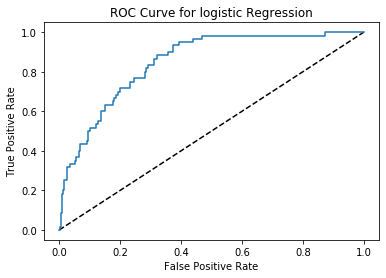

In [125]:
# Import necessary modules
from sklearn.metrics import roc_curve
from sklearn import metrics
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for logistic Regression')
plt.show()

#### XGBoost

In [126]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1, scoring="roc_auc")
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       420
         1.0       0.64      0.47      0.54        60

    accuracy                           0.90       480
   macro avg       0.78      0.71      0.74       480
weighted avg       0.89      0.90      0.89       480



In [127]:
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [128]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [129]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

In [130]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.6s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   14.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   36.2s
[Parallel(n_jobs=10)]: Done 480 out of 480 | elapsed:   42.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
         

In [131]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [132]:
y_pred5 = grid_search.predict(X_test)
print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       420
         1.0       0.69      0.48      0.57        60

    accuracy                           0.91       480
   macro avg       0.81      0.73      0.76       480
weighted avg       0.90      0.91      0.90       480

[[407  13]
 [ 31  29]]


0.9041666666666667


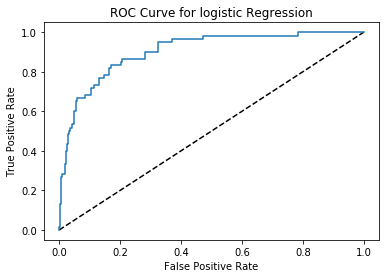

In [133]:
# Import necessary modules
#from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = grid_search.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for logistic Regression')
plt.show()

#### Decision Tree

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('tree', DecisionTreeClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)


# Fit the pipeline to the training set: knn_scaled
tree_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a Decision Tree classifier to the unscaled data
tree_unscaled = DecisionTreeClassifier().fit(trainX_red, trainy_red)

y_pred = pipeline.predict(X_test)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(tree_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(tree_unscaled.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy with Scaling: 0.88125
Accuracy without Scaling: 0.5979166666666667
[[383  37]
 [ 20  40]]
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       420
         1.0       0.52      0.67      0.58        60

    accuracy                           0.88       480
   macro avg       0.73      0.79      0.76       480
weighted avg       0.90      0.88      0.89       480



#### Grid Search for Decision Tree Classifier

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), 'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7056 candidates, totalling 35280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 35280 out of 35280 | elapsed:  3.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [136]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=18,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

0.7500793650793651


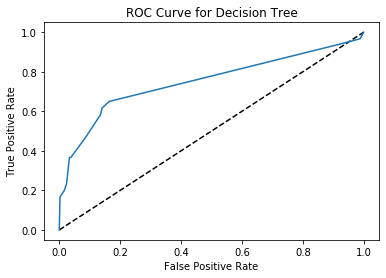

In [137]:
# Import necessary modules
#from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = grid_search_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.show()

#### Random Forest

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Create the pipeline: pipeline
rf = RandomForestClassifier(class_weight='balanced')

# Fit the pipeline to the training set: rf_scaled
rf_scaled = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(rf_scaled.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy with Scaling: 0.9333333333333333
[[414   6]
 [ 26  34]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       420
         1.0       0.85      0.57      0.68        60

    accuracy                           0.93       480
   macro avg       0.90      0.78      0.82       480
weighted avg       0.93      0.93      0.93       480



#### Hyper parameter tuning for Random Forest classifier

#### Grid Search CV

In [139]:
import random
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6],
    'max_depth': [1, 2, 3, 5, 10, 20, 30]
}

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# create random forest classifier model
rf_model = RandomForestClassifier(random_state=1)

# set up grid search meta-estimator
clf = GridSearchCV(rf_model, model_params, cv=5, scoring='roc_auc')

# train the grid search meta-estimator to find the best model
model = clf.fit(X_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 0.25,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [141]:
#Best parameters for our svc model
model.best_params_

{'max_depth': 20,
 'max_features': 0.25,
 'min_samples_split': 2,
 'n_estimators': 150}

In [142]:
#Let's run our rf again with the best parameters.
svc2 = RandomForestClassifier(max_features = 0.25, min_samples_split = 2, n_estimators = 150)
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))
print(metrics.confusion_matrix(y_test, pred_svc2))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       420
         1.0       0.82      0.52      0.63        60

    accuracy                           0.93       480
   macro avg       0.88      0.75      0.80       480
weighted avg       0.92      0.93      0.92       480

[[413   7]
 [ 29  31]]


0.9182936507936508


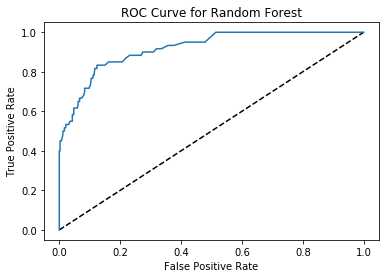

In [143]:
# Compute predicted probabilities: y_pred_prob
from sklearn import metrics
y_pred_prob = svc2.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

#### Custom Thresholding to get better model performance

In [167]:
from sklearn.metrics import f1_score
from numpy import argmax
from numpy import arange
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
# apply threshold to positive probabilities to create labels
def adjust_pred_prob(y_pred_prob, new_threshold):
    """Adjust predicted probabilities to match new threshold value"""
    
    return [1 if y >= new_threshold else 0 for y in y_pred_prob]

# define thresholds
thresholds = arange(0, 1, 0.001)

# evaluate each threshold
scores = [balanced_accuracy_score(y_test, adjust_pred_prob(y_pred_prob, t)) for t in thresholds]

# get best threshold
ix = argmax(scores)
# Highest Balanced Accuracy
print('Threshold=%.3f, Balanced Accuracy Score=%.5f' % (thresholds[ix], scores[ix]))
# Confusion matrix
adjusted_y_pred = adjust_pred_prob(y_pred_prob, new_threshold=.207)
print(classification_report(y_test, adjusted_y_pred))
print(metrics.confusion_matrix(y_test, adjusted_y_pred))

Threshold=0.207, Balanced Accuracy Score=0.85476
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92       420
         1.0       0.49      0.83      0.62        60

    accuracy                           0.87       480
   macro avg       0.73      0.85      0.77       480
weighted avg       0.91      0.87      0.88       480

[[368  52]
 [ 10  50]]


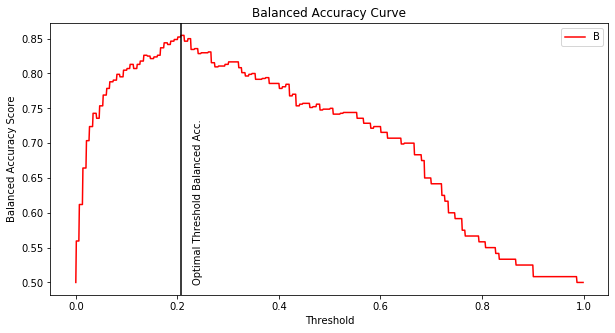

In [163]:
plt.figure(figsize=(10,5))
plt.plot(thresholds, scores, color='red')
plt.title('Balanced Accuracy Curve')
plt.legend(('Balanced Accuracy'))
plt.xlabel('Threshold')
plt.axvline(x=.207, color='black')
plt.text(.23,.50,'Optimal Threshold Balanced Acc.',rotation=90)
plt.ylabel('Balanced Accuracy Score')
plt.show()

#### Feature Importance

In [149]:
features = scaled_red.drop(['good quality'], axis=1)
features.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

##### For XGBoost

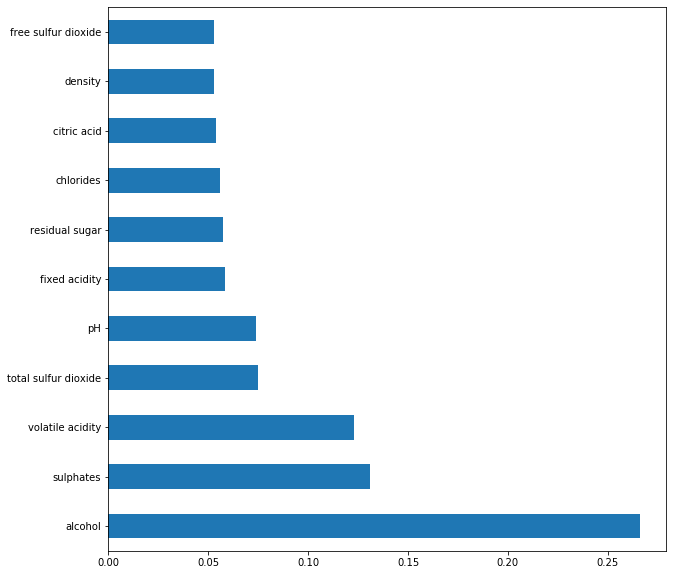

In [150]:
feat_importances = pd.Series(model5.feature_importances_, index=features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

##### For Random Forest

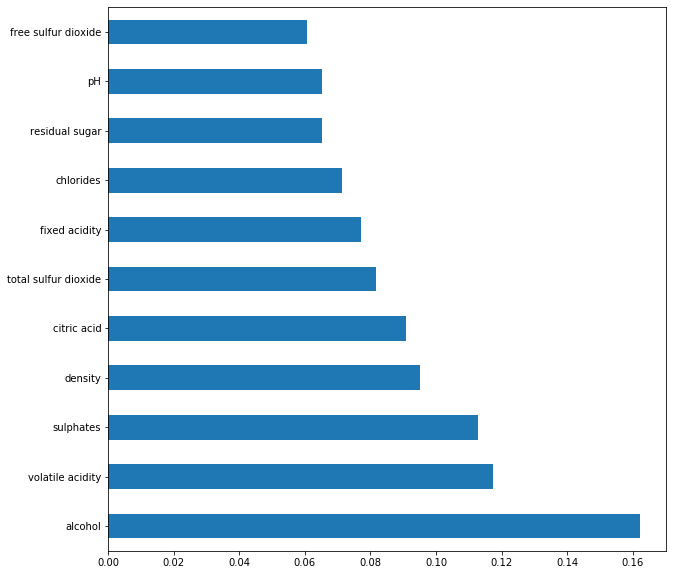

In [148]:
feat_importances = pd.Series(svc2.feature_importances_, index=features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

##### Checking for differences in top 4 features for good and bad quality wines

In [112]:
# Filtering df for only good quality
df_temp = result_red[result_red['good quality']==1]
df_temp.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good quality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,7.082949,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,1.0
std,0.276443,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.0
min,7.000000,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,1.0
25%,7.000000,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,1.0
50%,7.000000,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,1.0
75%,7.000000,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,1.0
max,8.000000,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,1.0


In [414]:
# Filtering df for only bad quality
df_temp2 = result_red[result_red['good quality']==0]
df_temp2.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good quality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,5.408828,8.239074,0.546921,0.254595,2.512120,0.089281,16.172214,48.285818,0.996859,3.314327,0.644616,10.251037,0.0
std,0.601719,1.681214,0.176312,0.189541,1.415778,0.049113,10.467685,32.585604,0.001808,0.153917,0.170602,0.969664,0.0
min,3.000000,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.0
25%,5.000000,7.100000,0.420000,0.090000,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,0.0
50%,5.000000,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,0.0
75%,6.000000,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.400000,0.700000,10.900000,0.0
max,6.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,0.0


The differences are slight, but "Good quality" wines tend to have a higher level of alcohol content, sulphates and chlorides and lower level of volatile acidity.

### Maching learning on white wines using sklearn

In [168]:
# see proportion of good vs bad quality wines
result_white['good quality'].value_counts()

0    3838
1    1060
Name: good quality, dtype: int64

#### Make X and y

In [169]:
# Drop the non numerical columns because they do not provide any useful information
X = scaled_white.drop(['good quality'], axis=1)
y = scaled_white['good quality']

In [170]:
scaled_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good quality
0,-0.6,1.727273,-0.500000,-0.097561,1.428571,1.260870,1.220339,0.059395,0.473684,0.357143,-0.315789,0.0
1,3.0,0.909091,1.166667,0.646341,0.000000,-1.304348,-0.864407,0.424900,-1.526316,-1.214286,-0.157895,0.0
2,-1.3,2.045455,-2.666667,-0.451220,1.571429,-1.130435,-0.525424,0.059395,2.368421,-0.500000,-0.368421,0.0
3,-0.4,3.045455,-1.500000,0.000000,1.071429,-0.826087,-0.627119,0.310680,1.052632,-0.785714,-0.736842,0.0
4,0.8,2.000000,0.416667,-0.536585,-0.428571,-1.304348,-0.576271,-0.808681,-0.789474,-0.571429,0.526316,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.7,0.545455,-0.333333,0.170732,-1.571429,-0.217391,-0.033898,-0.424900,-0.157895,-0.785714,0.552632,1.0
4894,-0.6,1.090909,0.833333,-0.329268,-0.357143,0.000000,-0.288136,-0.552827,0.947368,0.857143,0.631579,1.0
4895,-0.6,-0.454545,-0.333333,0.060976,-1.071429,0.478261,-0.220339,-0.470588,0.157895,4.357143,0.921053,1.0
4896,-0.6,1.363636,-0.833333,-0.402439,-1.428571,-1.260870,-1.322034,-1.018846,-0.736842,2.285714,1.368421,1.0


In [171]:
scaled_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good quality
0,-0.238095,0.28,-0.545455,3.142857,0.35,-0.571429,-0.225,0.290828,0.368421,-0.666667,-0.75000,0.0
1,-1.047619,2.44,-0.515152,-1.000000,4.65,-0.500000,-0.475,-1.230425,1.000000,-0.777778,-0.25000,0.0
2,0.428571,0.36,0.121212,0.857143,0.45,0.214286,0.200,0.380313,-0.263158,-0.611111,-0.56250,0.0
3,-1.571429,0.00,-0.333333,-0.142857,-1.25,-0.428571,0.675,-1.498881,3.105263,-0.333333,1.81250,0.0
4,0.190476,0.62,0.000000,-0.142857,0.25,-0.214286,0.125,0.380313,0.000000,-0.500000,-0.62500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-0.238095,-1.08,0.090909,0.000000,-1.25,0.357143,0.275,-0.040268,0.473684,0.777778,0.43750,1.0
1595,0.238095,-0.60,0.515152,0.142857,-0.80,-0.142857,-0.475,-0.559284,-0.736842,1.055556,0.62500,1.0
1596,-0.238095,-0.64,0.121212,-0.571429,-0.25,0.214286,-0.350,-1.145414,-0.368421,0.444444,0.75000,1.0
1597,-0.428571,0.16,-0.272727,-0.714286,-0.70,0.071429,-0.350,-0.720358,0.684211,0.333333,0.21875,1.0


#### Train Test Split

In [172]:
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

#### Logistic Regression

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Setup the pipeline steps: steps
logreg = LogisticRegression()
        
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      1143
         1.0       0.63      0.25      0.36       327

    accuracy                           0.80      1470
   macro avg       0.72      0.60      0.62      1470
weighted avg       0.77      0.80      0.77      1470



In [174]:
accuracy = logreg.score(X_test, y_test)
accuracy

0.8

Precision is higher than recall for this logistic regression model. The model correctly classifies white wines as "high" quality (>=7) only 25% of the time. But the model is able to return relevant results 63% of the times. Understandably, the F1 score for classification of high quality wines is low since it is the harmonic mean of precision and recall for the same.
Overall the accuracy of the model is 80% which also has room for improvement. 
Let us now check the ROC curve for this model!

From the ROC Curve, there seems to be 80.33% chance that the model is able to distinguish correctly between the positive and negative class.

Let us now try XGBoost technique for predicting white wine quality, to see if it performs any better than logistic regression!

#### Hyper parameter tuning using RandomisedSearchCV

In [209]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(logreg, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1, scoring='roc_auc')

# Fit randomized search
best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print("Tuned Logistic Regression Accuracy: {}".format(clf.best_score_))

Best Penalty: l2
Best C: 2.3462201620079717
Tuned Logistic Regression Accuracy: 0.7863038421966494


In [210]:
y_pred5 = clf.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      1143
         1.0       0.63      0.25      0.36       327

    accuracy                           0.80      1470
   macro avg       0.72      0.60      0.62      1470
weighted avg       0.78      0.80      0.77      1470



#### GridSeachCV

In [175]:
# Import the necessary modules
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=200, solver='liblinear')

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7862710621646682


In [176]:
y_pred5 = logreg_cv.predict(X_test)
print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      1143
         1.0       0.63      0.25      0.36       327

    accuracy                           0.80      1470
   macro avg       0.73      0.61      0.62      1470
weighted avg       0.78      0.80      0.77      1470

[[1095   48]
 [ 244   83]]


#### ROC Curve for logistic regression model

0.8033208387177903


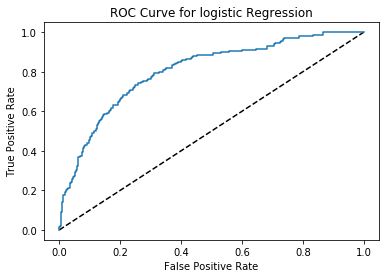

In [177]:
# Import necessary modules
#from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for logistic Regression')
plt.show()

#### XGBoost for imbalanced data

In [178]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1143
         1.0       0.73      0.41      0.52       327

    accuracy                           0.83      1470
   macro avg       0.79      0.68      0.71      1470
weighted avg       0.82      0.83      0.82      1470



In [179]:
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [180]:
parameters = {
    'max_depth': range (2, 12, 1),
    'n_estimators': range(70, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [181]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

In [182]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.8s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   35.9s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 600 out of 600 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 12),
                         'n_estimators': range(70, 220, 40)},
         

In [183]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=110, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [184]:
y_pred5 = grid_search.predict(X_test)
print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      1143
         1.0       0.80      0.60      0.68       327

    accuracy                           0.88      1470
   macro avg       0.85      0.78      0.80      1470
weighted avg       0.87      0.88      0.87      1470

[[1094   49]
 [ 132  195]]


0.9071518965328111


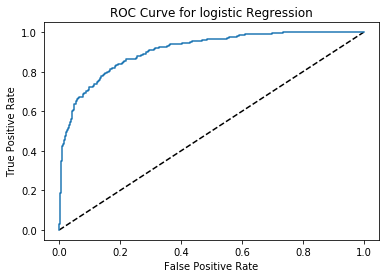

In [185]:
# Import necessary modules
#from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = grid_search.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for logistic Regression')
plt.show()

There does seem to be slight improvement in precision and recall but the f1 score is close to 50% which means the model is not able to distinguish between the positive and negative class! The accuracy however has improved very slightly at 83%, compared to the logistic regression model. 

Next, lets see how the Decision Tree classifier performs!

### Decision Tree classifier

In [186]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('tree', DecisionTreeClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: tree_scaled
tree_scaled = pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(tree_scaled.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy with Scaling: 0.8238095238095238
[[1006  137]
 [ 122  205]]
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      1143
         1.0       0.60      0.63      0.61       327

    accuracy                           0.82      1470
   macro avg       0.75      0.75      0.75      1470
weighted avg       0.83      0.82      0.83      1470



There is a lot of difference between the accuracies of scaled and unscaled data. Scaling does seem to help! The f1 score is better than both the logistics regression and XGBoost model. There seems to be balance between precision and recall values. 60% of the models results are relevant and 64% of the relevant results have been correctly classified by the model!

#### Grid Search for Decision Tree Classifier

In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), 'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, scoring='roc_auc', cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 7056 candidates, totalling 21168 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 21168 out of 21168 | elapsed: 11.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [188]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=34,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [189]:
y_pred5 = grid_search_cv.predict(X_test)
print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      1143
         1.0       0.65      0.35      0.46       327

    accuracy                           0.81      1470
   macro avg       0.74      0.65      0.67      1470
weighted avg       0.79      0.81      0.79      1470

[[1080   63]
 [ 211  116]]


#### ROC Curve

0.7535256487434484


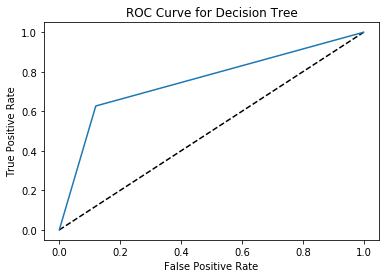

In [190]:
# Import necessary modules
#from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = tree_scaled.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
#'''
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.show()
#'''

We now try the Random Forest classifier!

#### Random Forest Classifier

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(class_weight='balanced', n_estimators=100)
# Fit the pipeline to the training set: rf_scaled
rf_scaled = rf.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(rf_scaled.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy with Scaling: 0.8693877551020408
[[1006  137]
 [ 122  205]]
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      1143
         1.0       0.60      0.63      0.61       327

    accuracy                           0.82      1470
   macro avg       0.75      0.75      0.75      1470
weighted avg       0.83      0.82      0.83      1470



Random forest at 87.89% yields the best accuracy so far amongst all the models! The f1 score is slightly improved at 0.62 and the precision and recall values are almost the same as the Decision Tree classifier. 

Since Random Forest gave us good accuracy we will now try to tune the model parameters to improve accuracy further.

#### Hyper parameter tuning for Random Forest using Randomized Search CV

In [212]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [4, None],
              "max_features": randint(1, 12),
              "min_samples_leaf": randint(1, 12), "criterion": ['gini', 'entropy']}

# Instantiate a Random Forest classifier: rf
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100)

# Instantiate the RandomizedSearchCV object: tree_cv
rf_cv = RandomizedSearchCV(rf, param_dist, cv=5, scoring='roc_auc')

# Fit it to the data
rf_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1}
Best score is 0.9022150639807096


0.9118153044325117


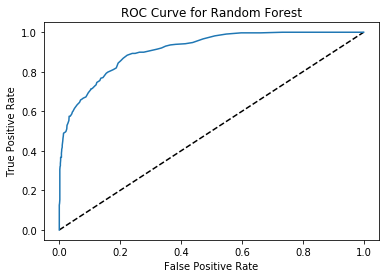

In [215]:
from sklearn import metrics
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

The best accuracy score after tuning the random forest model parameters is 88.85%. 

#### Grid Search on Random Forest

In [192]:
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

In [193]:
from sklearn.model_selection import GridSearchCV
# create random forest classifier model
rf_model = RandomForestClassifier(random_state=1)

# set up grid search meta-estimator
clf = GridSearchCV(rf_model, model_params, cv=5, scoring='roc_auc')

# train the grid search meta-estimator to find the best model
model = clf.fit(X_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.25,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [194]:
#Best parameters for our svc model
model.best_params_

{'max_features': 0.25, 'min_samples_split': 2, 'n_estimators': 250}

In [195]:
#Let's run our rf again with the best parameters.
svc2 = RandomForestClassifier(max_features = 0.25, min_samples_split = 2, n_estimators = 150)
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))
print(confusion_matrix(y_test, pred_svc2))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93      1143
         1.0       0.86      0.55      0.67       327

    accuracy                           0.88      1470
   macro avg       0.87      0.76      0.80      1470
weighted avg       0.88      0.88      0.87      1470

[[1114   29]
 [ 147  180]]


0.918038532645193


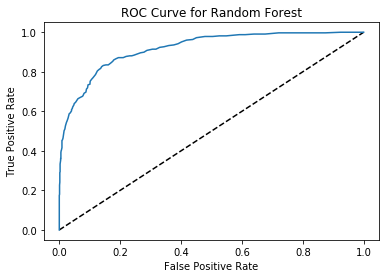

In [202]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = svc2.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

The accuracy improves slightly to 92% but there is a good improvement in precision and recall scores. 0.87 precision score tells us that the random forest model is able to give relevant results for positive class 87% of the times. A recall of 0.57 indicates that the model correctly classifies the positive class from the relevant results, 57% of the times. F1 score has now improved to 0.69 which better than all the earlier models.

We now have a good model at hand which us able to classify wine quality as high or low with an accuracy of 88%. We will still try custom set the threshold to check for improvements in the model.

#### Custom Thresholding to get better model performance

In [197]:
from sklearn.metrics import f1_score
from numpy import argmax
from numpy import arange
from sklearn.metrics import balanced_accuracy_score
# apply threshold to positive probabilities to create labels
def adjust_pred_prob(y_pred_prob, new_threshold):
    """Adjust predicted probabilities to match new threshold value"""
    
    return [1 if y >= new_threshold else 0 for y in y_pred_prob]

# define thresholds
thresholds = arange(0, 1, 0.001)

# evaluate each threshold
scores = [balanced_accuracy_score(y_test, adjust_pred_prob(y_pred_prob, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
# Highest Balanced Accuracy
print('Threshold=%.3f, Balanced Accuracy Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.281, Balanced Accuracy Score=0.84372


In [200]:
# Confusion matrix
adjusted_y_pred = adjust_pred_prob(y_pred_prob, new_threshold=.281)
print(metrics.confusion_matrix(y_test, adjusted_y_pred))
print(classification_report(y_test, adjusted_y_pred))
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, adjusted_y_pred)
print(metrics.auc(fpr, tpr))

[[978 165]
 [ 55 272]]
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90      1143
         1.0       0.62      0.83      0.71       327

    accuracy                           0.85      1470
   macro avg       0.78      0.84      0.81      1470
weighted avg       0.87      0.85      0.86      1470

0.8437236629824941


In [204]:
from sklearn.metrics import f1_score
from numpy import argmax
from numpy import arange
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
# apply threshold to positive probabilities to create labels
def adjust_pred_prob(y_pred_prob, new_threshold):
    """Adjust predicted probabilities to match new threshold value"""
    
    return [1 if y >= new_threshold else 0 for y in y_pred_prob]

# define thresholds
thresholds = arange(0, 1, 0.001)

# evaluate each threshold
scores = [balanced_accuracy_score(y_test, adjust_pred_prob(y_pred_prob, t)) for t in thresholds]

# get best threshold
ix = argmax(scores)
# Highest Balanced Accuracy
print('Threshold=%.3f, Balanced Accuracy Score=%.5f' % (thresholds[ix], scores[ix]))
# Confusion matrix
adjusted_y_pred = adjust_pred_prob(y_pred_prob, new_threshold=.281)
print(classification_report(y_test, adjusted_y_pred))
print(metrics.confusion_matrix(y_test, adjusted_y_pred))

Threshold=0.281, Balanced Accuracy Score=0.84372
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90      1143
         1.0       0.62      0.83      0.71       327

    accuracy                           0.85      1470
   macro avg       0.78      0.84      0.81      1470
weighted avg       0.87      0.85      0.86      1470

[[978 165]
 [ 55 272]]


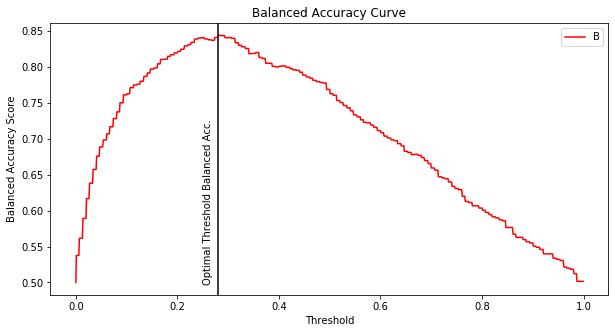

In [206]:
plt.figure(figsize=(10,5))
plt.plot(thresholds, scores, color='red')
plt.title('Balanced Accuracy Curve')
plt.legend(('Balanced Accuracy'))
plt.xlabel('Threshold')
plt.axvline(x=.281, color='black')
plt.text(.25,.50,'Optimal Threshold Balanced Acc.',rotation=90)
plt.ylabel('Balanced Accuracy Score')
plt.show()

In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = svc2.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print(metrics.auc(fpr, tpr))

#### Feature Importance

##### For Random Forest

In [159]:
features = scaled_df.drop(['good quality'], axis=1)
features.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

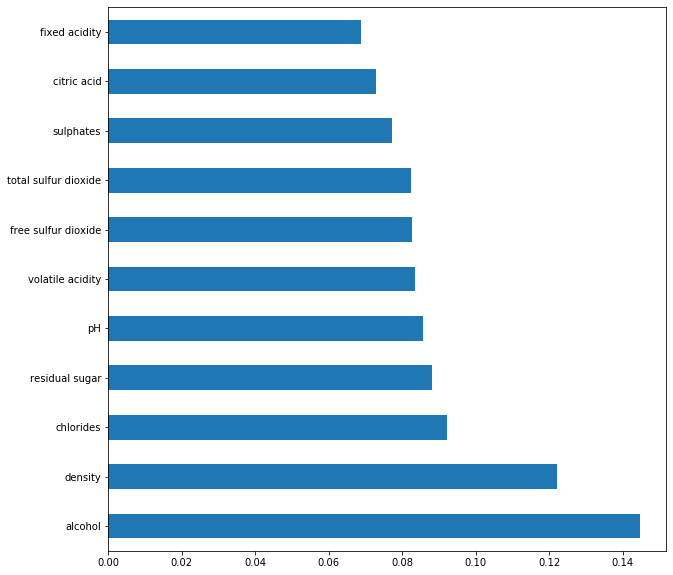

In [160]:
feat_importances = pd.Series(svc2.feature_importances_, index=features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

##### For Logistic Regression?

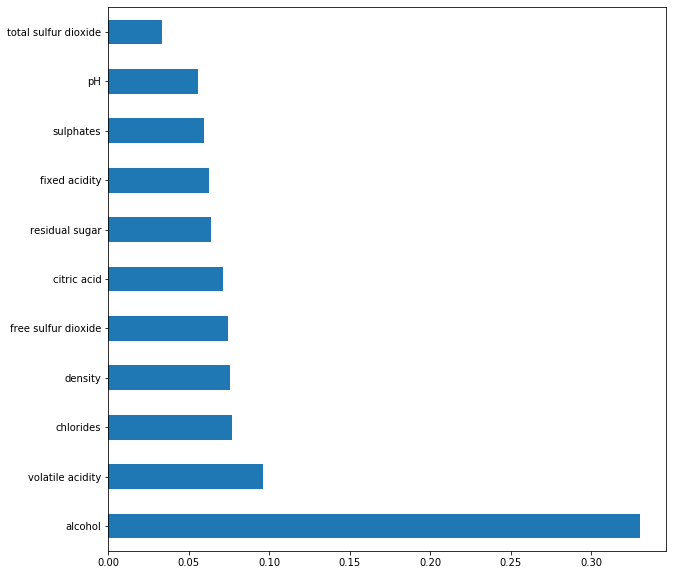

In [161]:
feat_importances = pd.Series(model5.feature_importances_, index=features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

##### Checking for differences in top 4 features for good and bad quality wines

In [162]:
# Filtering df for only good quality
df_temp = result_white[result_white['good quality']==1]
df_temp.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good quality
count,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.0
mean,7.174528,6.725708,0.265392,0.326057,5.264245,0.038160,34.550472,125.245283,0.992412,3.214755,0.500142,11.416022,1.0
std,0.391978,0.768632,0.093962,0.080288,4.289880,0.011145,13.797146,32.724848,0.002772,0.156979,0.133044,1.255209,0.0
min,7.000000,3.900000,0.080000,0.010000,0.800000,0.012000,5.000000,34.000000,0.987110,2.840000,0.220000,8.500000,1.0
25%,7.000000,6.200000,0.190000,0.280000,1.800000,0.031000,25.000000,101.000000,0.990500,3.100000,0.400000,10.700000,1.0
50%,7.000000,6.700000,0.250000,0.310000,3.900000,0.037000,33.000000,122.000000,0.991730,3.200000,0.480000,11.500000,1.0
75%,7.000000,7.200000,0.320000,0.360000,7.400000,0.044000,42.000000,146.000000,0.993605,3.320000,0.580000,12.400000,1.0
max,9.000000,9.200000,0.760000,0.740000,19.250000,0.135000,108.000000,229.000000,1.000600,3.820000,1.080000,14.200000,1.0


In [163]:
# Filtering df for only bad quality
df_temp2 = result_white[result_white['good quality']==0]
df_temp2.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good quality
count,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.0
mean,5.519802,6.891271,0.281770,0.336506,6.704442,0.047881,35.517327,141.982934,0.994474,3.180855,0.486978,10.265215,0.0
std,0.604905,0.859209,0.102263,0.129888,5.224429,0.023544,17.787825,44.145402,0.002894,0.148370,0.108164,1.100576,0.0
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987220,2.720000,0.230000,8.000000,0.0
25%,5.000000,6.300000,0.220000,0.260000,1.700000,0.037000,23.000000,111.000000,0.992320,3.080000,0.410000,9.400000,0.0
50%,6.000000,6.800000,0.267500,0.320000,6.000000,0.045000,34.000000,140.000000,0.994380,3.170000,0.470000,10.000000,0.0
75%,6.000000,7.400000,0.320000,0.400000,10.400000,0.051000,47.000000,173.000000,0.996570,3.260000,0.540000,11.000000,0.0
max,6.000000,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.810000,1.060000,14.000000,0.0


The differences are slight, but "Good quality" wines tend to have a higher level of alcohol content, sulphates and chlorides and lower level of volatile acidity.